In [ ]:
!pip install twitter 
!pip install NetworkX
!pip install powerlaw
!pip install string
!pip install textblob

In [2]:
import powerlaw
import pandas as pd
from textblob import TextBlob
import requests
import pickle
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import nltk
from nltk import ngrams
from nltk.corpus import stopwords
import re
import networkx as nx
import string
import re
from itertools import combinations

In [5]:


df = pd.read_csv('df_tutti.csv')

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation.replace('#','')])
    #text = re.sub('[0-9]+', '', text)
    return text

def remove_hashtags(text):
    # Define the regular expression pattern to match words starting with "#"
    pattern = re.compile(r"\B#\w\w+\b\s*")

    # Use the sub() function to replace matched patterns with an empty string
    result = pattern.sub("", text)

    return result

def remove_useless_words(text):
    stop_words = set(stopwords.words('italian'))

def combina(text):
    comb=list(combinations(text, 2))
    return comb

#rimuoviamo dai tweet punteggiatura, hashtags e i tweet senza hashtags
    
df=df.drop_duplicates('tweet', keep='first')
df['Tweet_punct'] = df['tweet'].apply(lambda x: remove_punct(x))

df['Tweet_punct']=df['Tweet_punct'].apply(lambda x: remove_hashtags(x))


df['#'] = df['hashtags'].apply(lambda x: remove_punct(x)) 
mask = df['#'].str.len() > 0
df = df[mask]


#rimuoviamo dai tweet parole inutili e inferiori a lunghezza 3
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('italian'))

tweets = [tweet.lower().split() for tweet in df['Tweet_punct']]
tags = [t.lower().split() for t in df['#']]
tweets = [[word for word in tweet_words if not word in stop_words] for tweet_words in tweets]
tweets = [[word for word in tweet_words if len(word) >3] for tweet_words in tweets]


#creiamo dataframe (df_bigram_counts) con qualsiasi bigramma in un tweet e relativo counts tra i tweet
for i in range(0,len(tweets)):
    if i==0:
        comb=list(combinations(tweets[i], 2))
    else:
        comb[len(comb):]=list(combinations(tweets[i], 2))
bigram_counts = collections.Counter(comb)

df_bigram_counts = pd.DataFrame(bigram_counts.most_common(len(bigram_counts)), columns=['bigram', 'count'])


#creiamo dataframe (df_bigram_tags)con bigramma e tutti i relativi hashtag tra i tweet

comb_tag_df2=pd.DataFrame()
comb_tag_df2['words']=tweets
comb_tag_df2['tags']=tags

combina=[]
all_t=[]
for w, t in comb_tag_df2.values:
    for bi in list(combinations(w,2)):
        combina.append(bi)
        all_t.append(t)
df_bigram_tags=pd.DataFrame()
df_bigram_tags['bigram']=combina
df_bigram_tags['tags']=all_t
df_bigram_tags=df_bigram_tags.groupby(['bigram']).sum()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


NameError: name 'comb_tag' is not defined

In [55]:
df_final

,bigram,tags,count
600989,"(partito, democratico)","[redditodicittadinanza, letta, pdnetwork, elez...",468
359529,"(giorgia, meloni)","[elezionipolitiche22, 25settembre, inonda, pia...",327
109153,"(campagna, elettorale)","[25settembre, elezionipolitiche2022, dazndown,...",213
378158,"(governo, meloni)","[enews, 25settembre, terzopolo, italiasulserio...",132
183305,"(cordiali, saluti)","[governomeloni, governomeloni, governomeloni, ...",130
...,...,...,...
338704,"(fragile, httpstco77uzfonwei)","[25settembre, pierpaolopiccioli, elezionipolit...",1
338705,"(fragile, httpstcouxemvpedgk)","[25settembre, pierpaolopiccioli, elezionipolit...",1
338706,"(fragile, instagram)","[25settembre, pierpaolopiccioli, elezionipolit...",1
338707,"(fragile, passaggio)","[25settembre, pierpaolopiccioli, elezionipolit...",1


In [18]:

#dataframe finale ordinato per i counts con bigramma e tags
df_final=pd.merge(left=df_bigram_tags, right=df_bigram_counts, on='bigram')
df_final.sort_values(by=['count'], ascending=False, inplace=True)


In [56]:
G = nx.Graph()
s=[]

# Create connections between nodes
for k, t,v in df_final.values[:110267]:
    G.add_edge(k[0], k[1], weight=(1/v), attribute1=t)
    s.append(1/v)

In [57]:
print(G.number_of_nodes(),G.number_of_edges())

13464 99415


(array([7.0000e+00, 2.4000e+01, 2.2000e+01, 3.8000e+01, 4.0000e+01,
        6.3000e+01, 9.1000e+01, 1.1900e+02, 8.8000e+01, 1.5200e+02,
        1.1500e+02, 2.7400e+02, 2.7000e+02, 0.0000e+00, 3.1400e+02,
        3.2200e+02, 4.7300e+02, 0.0000e+00, 6.6400e+02, 0.0000e+00,
        0.0000e+00, 9.2700e+02, 0.0000e+00, 0.0000e+00, 1.2200e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.1520e+03, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.4300e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 7.2460e+03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.7430e+04, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

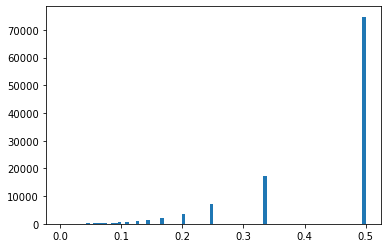

In [58]:
import matplotlib.pyplot as plt

figura, grafico = plt.subplots()
grafico.hist(s, 
             bins = len(np.unique(s)))

[]

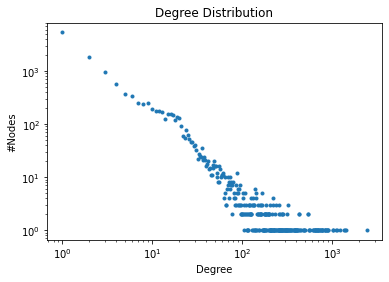

In [59]:
hist = nx.degree_histogram(G)

plt.plot(range(0, len(hist)), hist,'.')
#plt.plot(range(0, len(hist2)), hist,'-')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
# plt.ylim(0,50)
# plt.xlim(0,1)
plt.loglog()
# plt.show()